# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn

In [2]:
# Import Data
Data = pd.read_csv("EastWestAirlines.csv")
Data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
Data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


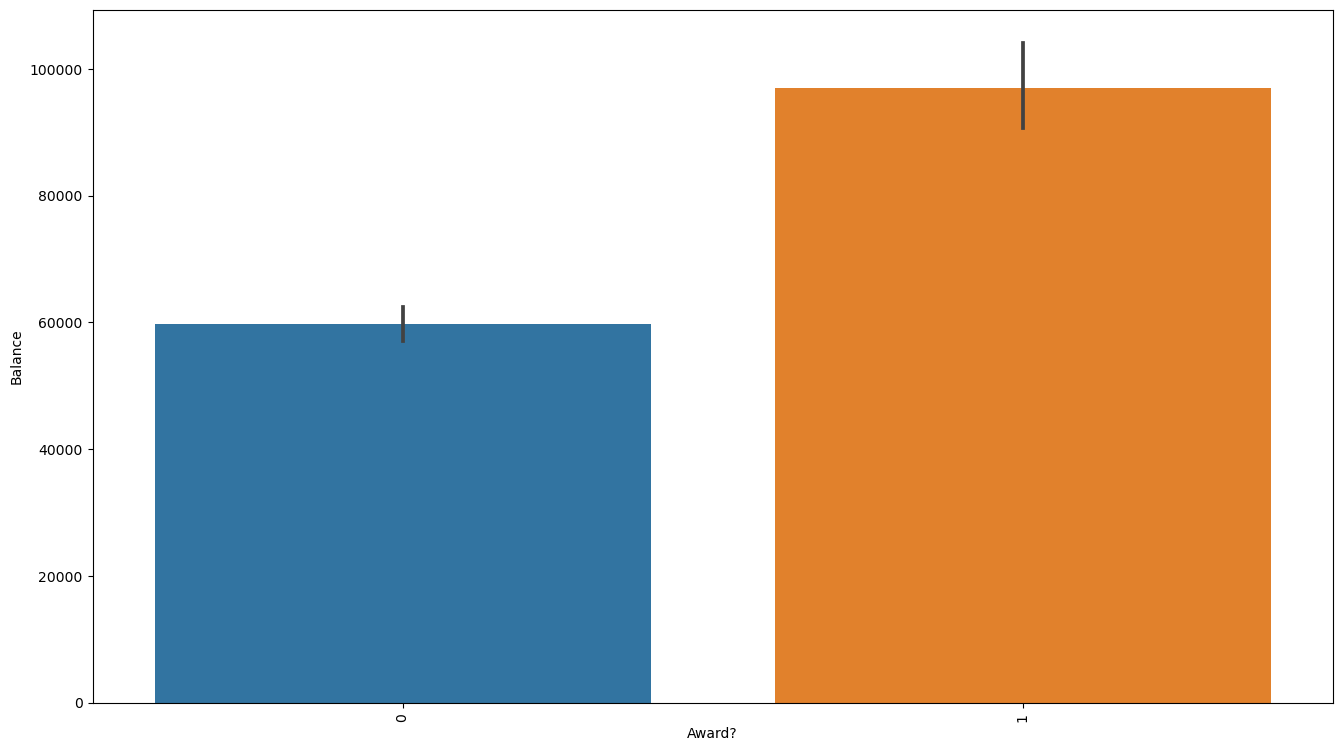

In [5]:
plt.figure(figsize = (16,9))
Balance = Data[['Award?','Balance']].sort_values('Balance', ascending = False)
ax = sn.barplot(x='Award?', y='Balance', data= Balance)
ax.set(xlabel = 'Award?', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [6]:
#correlation 
corr_matrix = Data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award?               0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID#                 -0.243737
Name: Balance, dtype: float64

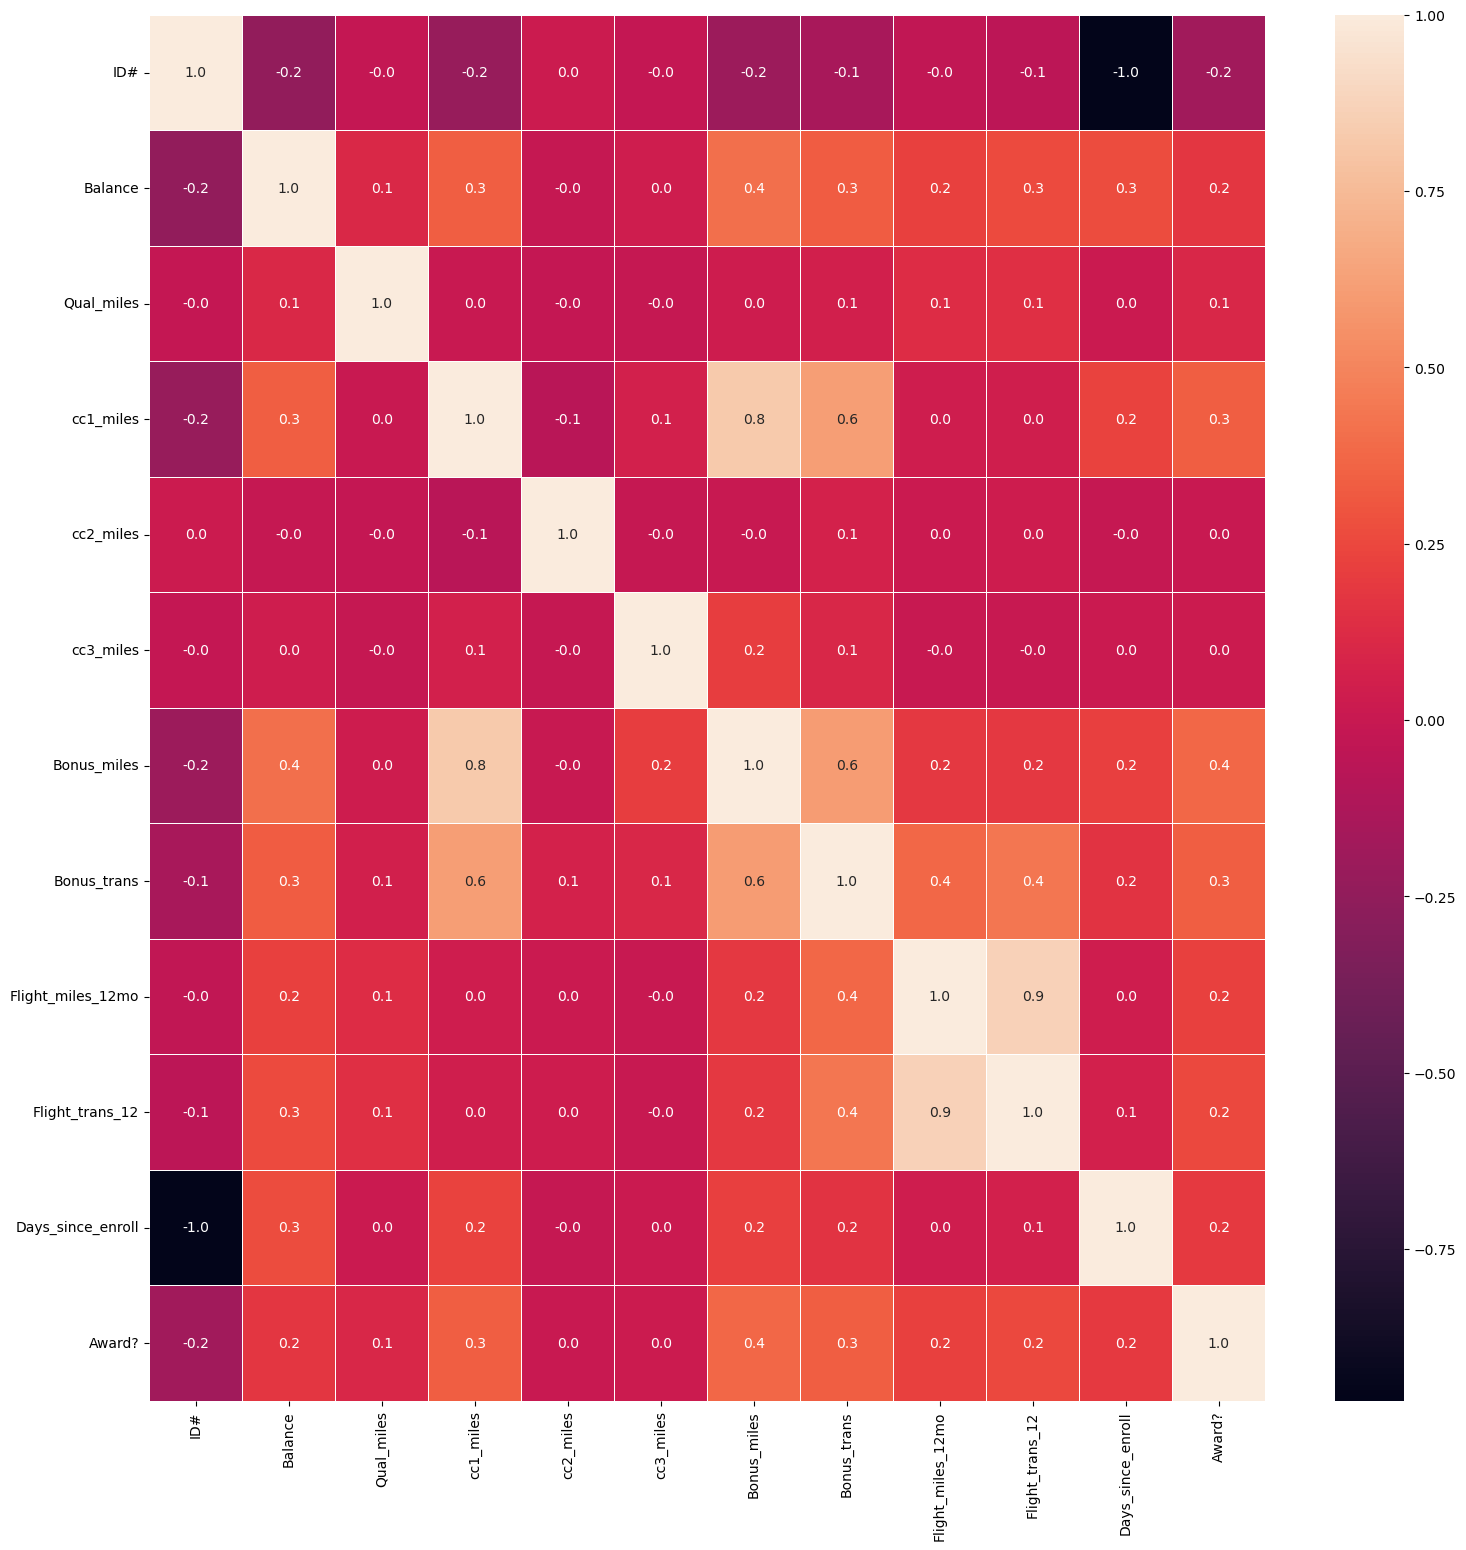

In [7]:
f,ax = plt.subplots(figsize=(18,18))
sn.heatmap(Data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

# Hierarchical Clustring Model

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [9]:
df_norm = norm_func(Data.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [10]:
df_norm.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


# Average

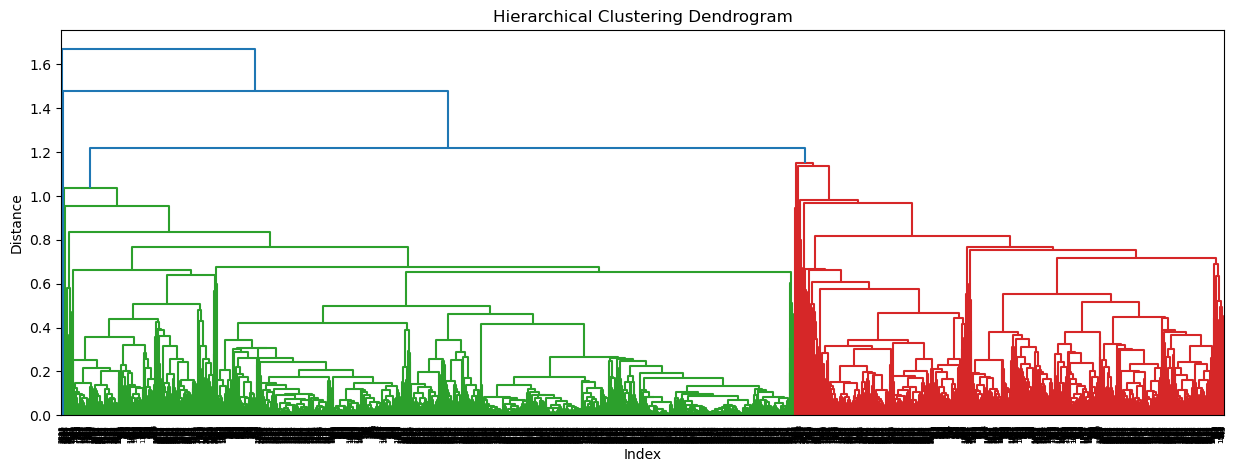

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [12]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df_norm['clust']=cluster_labels # creating a  new column and assigning it to new column 
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0


In [13]:
df_norm.iloc[:,:].groupby(df_norm.clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.056295,0.021580,0.414169,0.007834,0.000170,0.107487,0.180779,0.026094,0.046450,0.557646,1.0
1,0.035081,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0
3,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0
4,0.044910,0.013253,0.718750,0.000000,0.812500,0.437163,0.351744,0.019470,0.037736,0.618022,1.0


In [14]:
Data_0 = df_norm[(df_norm.clust==0)]
Data_0.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,0
11,0.056617,0.0,1.00,0.0,0.0,0.231735,0.220930,0.000000,0.000000,0.834579,1.0,0


In [15]:
Data_1 = df_norm[(df_norm.clust==1)]
Data_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0,1
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0,1
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0,1
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.0,0.0,0.837955,0.0,1
5,0.009631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836749,0.0,1


In [16]:
Data_2 = df_norm[(df_norm.clust==2)]
Data_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
275,1.0,0.0,0.0,0.0,0.0,0.06488,0.372093,0.156505,0.433962,0.877864,1.0,2


In [17]:
Data_3 = df_norm[(df_norm.clust==3)]
Data_3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
3583,0.093917,0.044851,0.00,0.0,0.0,0.272879,1.000000,1.000000,1.000000,0.165300,1.0,3
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3


In [18]:
Data_4 = df_norm[(df_norm.clust==4)]
Data_4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
384,0.016537,0.000000,1.00,0.0,0.75,0.392347,0.372093,0.000000,0.000000,0.841331,1.0,4
850,0.015033,0.000000,0.75,0.0,1.00,0.406955,0.418605,0.019470,0.037736,0.719074,1.0,4
904,0.009288,0.000000,0.25,0.0,1.00,0.425398,0.186047,0.000000,0.000000,0.702074,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4
1917,0.048674,0.000000,1.00,0.0,0.50,0.399435,0.511628,0.032450,0.037736,0.477695,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4


In [19]:
df_norm['clust'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: clust, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_subset = pd.DataFrame(scaler.fit_transform(df_norm.iloc[:,1:7]))
Data_subset.head()

,0,1,2,3,4,5
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394


# single

In [21]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df_norm['clust_s']=cluster_labels # creating a  new column and assigning it to new column 
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust_s
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1,4
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1,4
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1,4
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1,4
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0,1


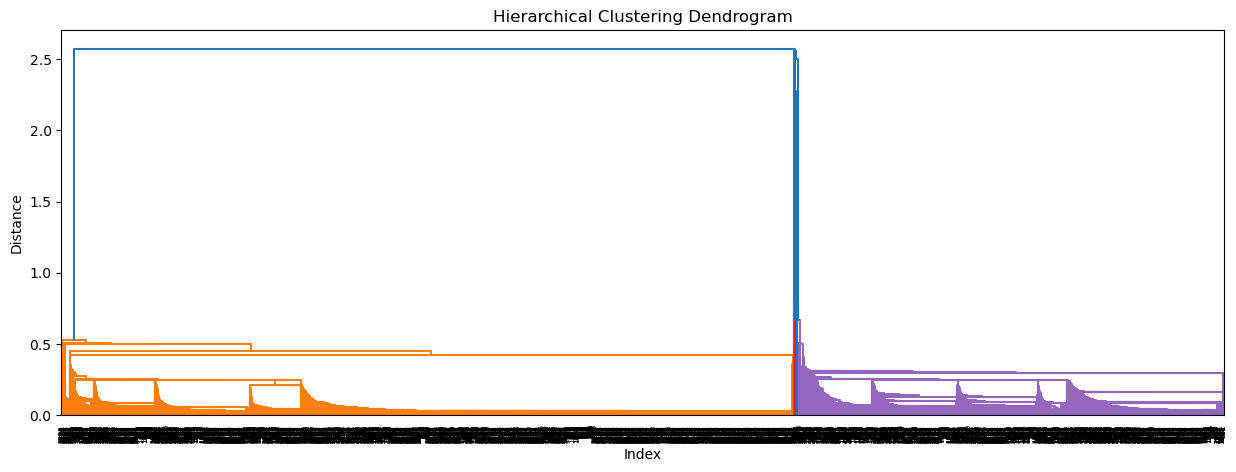

In [22]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [23]:
df_norm.iloc[:,:].groupby(df_norm.clust_s).mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust_s,,,,,,,,,,,,
0,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0,3.0
1,0.056295,0.021580,0.414169,0.007834,0.000170,0.107487,0.180779,0.026094,0.046450,0.557646,1.0,0.0
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2.0
3,0.044910,0.013253,0.718750,0.000000,0.812500,0.437163,0.351744,0.019470,0.037736,0.618022,1.0,4.0
4,0.035081,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0,1.0


In [24]:
df_norm['clust_s'].value_counts()

4    2518
1    1468
3       8
0       4
2       1
Name: clust_s, dtype: int64

# Complete

In [25]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df_norm['clust_c']=cluster_labels # creating a  new column and assigning it to new column 
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust_s,clust_c
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1,4,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1,4,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1,4,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1,4,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0,1,0


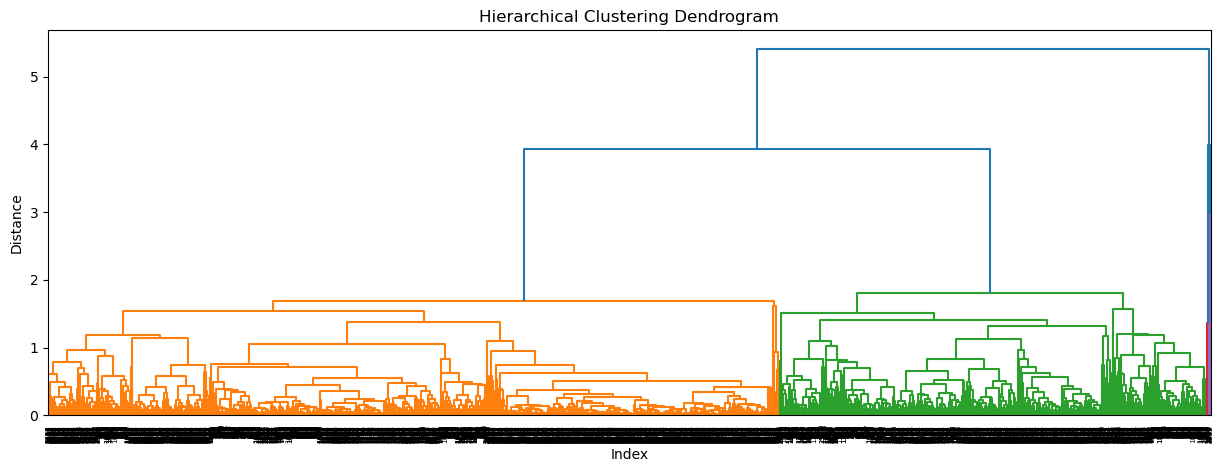

In [26]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [27]:
df_norm.iloc[:,1:].groupby(df_norm.clust_c).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust_s,clust_c
clust_c,,,,,,,,,,,,,
0,0.021580,0.414169,0.007834,0.000170,0.107487,0.180779,0.026094,0.046450,0.557646,1.0,0.0,1.0,0.0
1,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0,1.0,4.0,1.0
2,0.013253,0.718750,0.000000,0.812500,0.437163,0.351744,0.019470,0.037736,0.618022,1.0,4.0,3.0,2.0
3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0,3.0,0.0,3.0
4,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2.0,2.0,4.0


In [28]:
df_norm['clust_c'].value_counts()

1    2518
0    1468
2       8
3       4
4       1
Name: clust_c, dtype: int64

# Kmeans Clustering Model

In [29]:
from sklearn.cluster import KMeans

In [31]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([1.21416036e-01, 7.74587485e-01, 5.26958287e-01, 9.67975316e-01,
       1.80528610e-01, 8.49760179e-01, 5.81692053e-01, 2.70961388e-01,
       1.26079193e-01, 9.60144349e-02, 6.77466217e-01, 3.25908518e-01,
       6.90305055e-01, 7.42016243e-01, 1.25639482e-01, 8.09170463e-01,
       2.14124945e-01, 2.51307636e-01, 2.68858924e-01, 1.55332559e-01,
       6.44325152e-01, 3.11703532e-01, 4.63037471e-02, 5.92825382e-01,
       9.93488163e-01, 9.76922300e-01, 3.94358512e-01, 7.41520439e-01,
       5.28374816e-01, 5.65933312e-01, 7.21295804e-02, 3.35060427e-01,
       1.06588681e-01, 6.13217295e-01, 9.08519742e-01, 7.81103678e-02,
       5.78243753e-01, 1.25246225e-01, 6.33350149e-02, 5.40664479e-01,
       3.42602538e-01, 5.47345830e-01, 6.89242861e-01, 7.88436555e-01,
       3.44950732e-01, 1.60640380e-01, 6.89290173e-01, 1.59201401e-01,
       8.91787939e-01, 1.57529161e-01, 2.32410338e-01, 3.09759621e-01,
       9.97911545e-01, 8.77606357e-02, 1.50004172e-01, 9.95976911e-01,
      

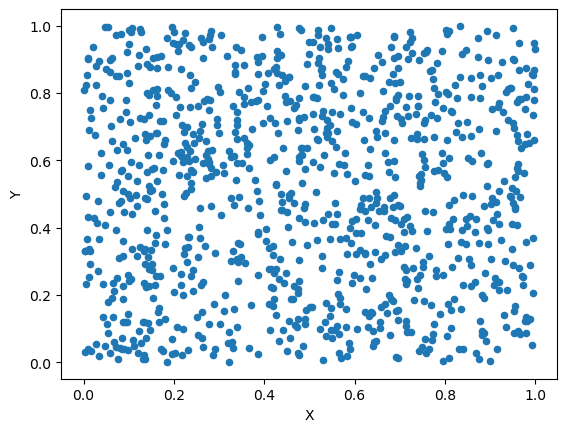

In [32]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

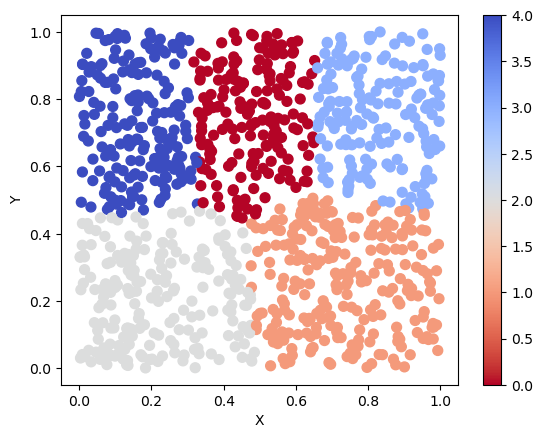

In [33]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

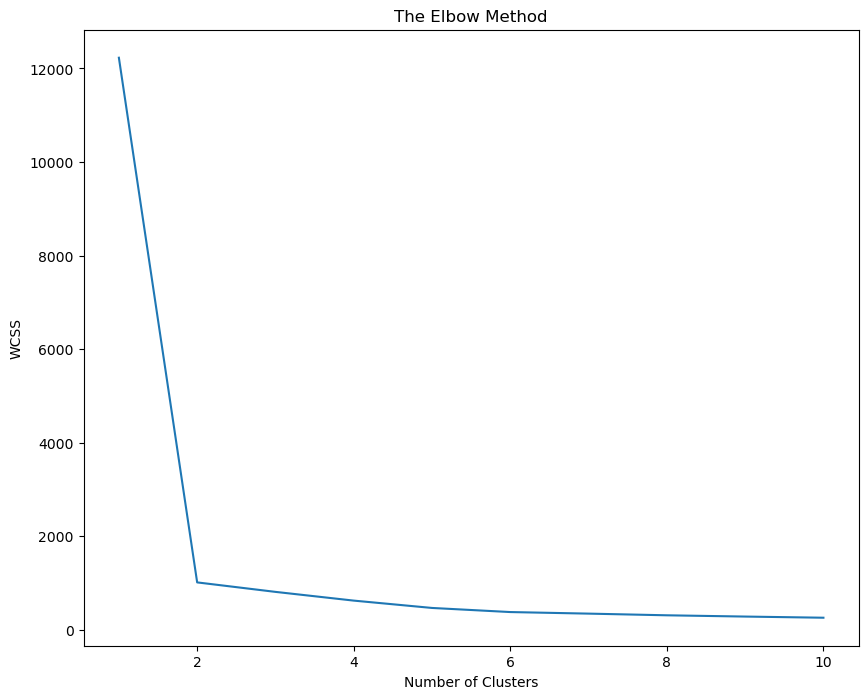

In [34]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [35]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm) 

In [36]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [37]:
y_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [38]:
clf.cluster_centers_ 

array([[ 6.37447216e-02,  1.78695730e-02,  7.27500000e-01,
         6.25000000e-04,  3.12500000e-04,  1.70313181e-01,
         2.32412791e-01,  2.18241149e-02,  3.85141509e-02,
         5.86936792e-01,  1.00000000e+00, -1.33226763e-15,
         1.00000000e+00, -1.22124533e-15],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01, -5.55111512e-16,  1.00000000e+00,
         4.00000000e+00,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -3.33066907e-16,  1.00000000e+00,
         4.00000000e+00,  1.00000000e+00],
       [ 4.73736980e-02,  2.60234375e-02,  3.89221557e-02,
         1.64670659e-02,  3.03576608e-18,  3.22460091e-02,
         1.18942348e-01,  3.12086182e-02,  5.

In [39]:
clf.inertia_

466.32677188251466

In [40]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Data['clust_k']=md # creating a  new column and assigning it to new column 
Data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [41]:
Data.iloc[:,1:7].groupby(Data.clust_k).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust_k,,,,,,
0,108674.423750,199.210000,3.910000,1.001250,1.001250,44909.031250
1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873
2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667
3,80764.480539,290.109281,1.155689,1.032934,1.000000,8502.788922
4,218873.615385,197.692308,3.230769,1.000000,3.000000,92448.538462


In [42]:
plt.style.use(['classic']) 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [43]:
#Normalizing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(Data.iloc[:,1:])
scaled_data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -3.04715858e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -3.04715858e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -3.04715858e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.32357766e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -3.04715858e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -3.04715858e-01]])

# Elbow Method

In [44]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    if i>5:
        break
wcss

[47988.0,
 39032.579910134045,
 34347.11757296944,
 30530.708897519682,
 26723.80884914274,
 23343.710945111914]

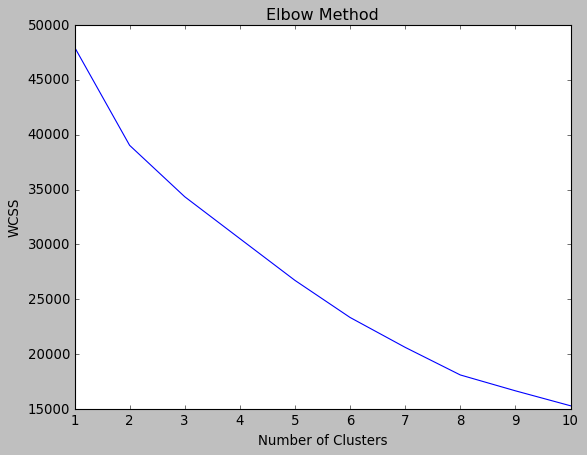

In [45]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
WCSS 

[12229.374858269763,
 1012.5618917650296,
 809.8824106188359,
 623.2331310606392,
 466.3273812363641,
 378.5613426533204,
 345.0313136790588,
 309.19295680909704,
 282.15220004074996,
 257.40152209144986]

In [47]:
Data['clust_k'].value_counts()

1    1897
0     800
3     668
2     621
4      13
Name: clust_k, dtype: int64

# DB Scan Clustering Model

In [48]:
from sklearn.cluster import DBSCAN

In [49]:
# Import Data
data = pd.read_csv("EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
array=data.values
array  

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_subset1 = pd.DataFrame(scaler.fit_transform(array))
Data_subset1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [52]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

neighbors = NearestNeighbors(n_neighbors=6)
fitneighbors = neighbors.fit(scaled_data_df)
distances, indices = fitneighbors.kneighbors(scaled_data_df)


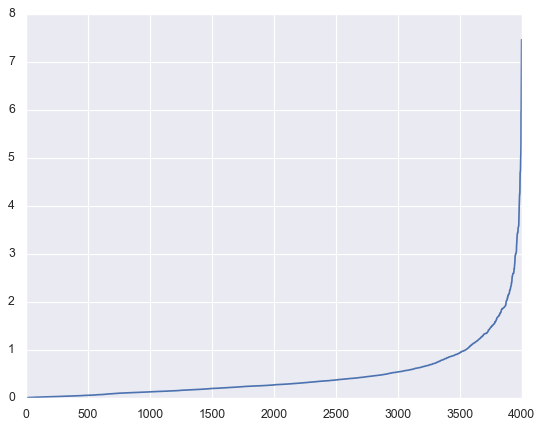

In [53]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)


In [54]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan.fit(Data_subset1)

DBSCAN(eps=1.2, min_samples=4)

In [55]:
#Noisy samples are given the label -1.
dbscan.labels_  

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_D'])   

In [57]:
cl
pd.set_option("display.max_rows", None)  

In [58]:
cl
pd.set_option("display.max_rows", None)  

In [59]:
cl

,cluster_D
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,-1
9,1


In [60]:
import sklearn
sklearn.metrics.silhouette_score(Data_subset1 ,dbscan.labels_)

0.13784733038041821

In [61]:
Data1 = pd.concat([data,cl],axis=1)  
Data1.head() 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_D
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [62]:
import sklearn
sklearn.metrics.silhouette_score(Data_subset1,dbscan.labels_)   

0.13784733038041821

In [63]:
Data1['cluster_D'].value_counts()

 0    2358
 1    1138
-1     463
 3      14
 5      14
 2       4
 4       4
 6       4
Name: cluster_D, dtype: int64